# Introduction

In this notebook, we implement [YOLOv4](https://arxiv.org/pdf/2004.10934.pdf) for training on a custom face mask detection dataset in PyTorch.

We will take the following steps to implement YOLOv4 on our custom data:
* Set up YOLOv4 environment
* Download Custom Dataset via Roboflow
* Train Custom YOLOv4 detector
* Reload Custom YOLOv4 detector weights for inference


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Set up YOLOv4 Environment

We clone roboflow-AI's github repo to train on their YOLOv4 model. This models has been pre-trained on the COCO dataset and we will fine-tune it to for mask detection. 

In [ ]:
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git

fatal: destination path 'pytorch-YOLOv4' already exists and is not an empty directory.


In [ ]:
%cd /content/pytorch-YOLOv4
!pip install -q numpy torch scikit_image matplotlib tqdm easydict Pillow tensorboardX # added torch
# This restarts the runtime--ignore any error messages
import os
# os.kill(os.getpid(), 9)/

/content/pytorch-YOLOv4


In [ ]:
%cd /content/pytorch-YOLOv4
!pip install -r requirements.txt
# This restarts the runtime--ignore any error messages
import os

/content/pytorch-YOLOv4


In [ ]:
# download yolov4 weights that have already been converted to PyTorch
%cd /content/pytorch-YOLOv4/cfg/
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

/content/pytorch-YOLOv4/cfg
Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth
100% 170M/170M [00:00<00:00, 314MB/s]


# Download Custom Dataset

## Export Your Dataset from Roboflow

Use Roboflow's API  to import the custom mask detection dataset created for this project from their website.

In [ ]:
%cd /content/
!curl -L "https://app.roboflow.com/ds/L4W7S5aV4g?key=tHp3EENR6Y" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1918      0 --:--:-- --:--:-- --:--:--  1918
100 47.1M  100 47.1M    0     0  61.7M      0 --:--:-- --:--:-- --:--:-- 61.7M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
 extracting: README.dataset.txt      
replace README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: README.roboflow.txt     
 extracting: test/_annotations.txt   
 extracting: test/_classes.txt       
 extracting: test/maksssksksss104_png.rf.67187f00e0dc669fa4c8588f18a52d56.jpg  
 extracting: test/maksssksksss10_png.rf.5a9fa4add22945d5784b7a98ac417d23.jpg  
 extracting: test/maksssksksss111_png.rf.c1f90ca5e9c580ff3d5f2088bae269ea.jpg  
 extracting: test/maksssksksss117_png.rf.7e94cfdd2103f274d64e99014148fc3c.jpg  
 extracting: test/maksssksksss153_png.rf.e4e

# Create necessary annotation and data folders.

In [ ]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

mkdir: cannot create directory ‘data’: File exists


In [ ]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [ ]:
print(num_classes)

3


# Train Custom Detector

In [ ]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python ./pytorch-YOLOv4/train.py -b 4 -s 1 -l 0.001 -g 0 -pretrained /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 1

log file path:log/log_2022-05-05_13-35-09.txt
2022-05-05 13:35:09,048 train.py[line:435] INFO: Using device cuda
2022-05-05 13:35:12,509 train.py[line:282] INFO: Starting training:
        Epochs:          1
        Batch size:      4
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   1781
        Validation size: 168
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 3
        Train label path:train.txt
        Pretrained:
    
Epoch 1/1:   0%|        | 0/1781 [00:00<?, ?img/s]/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/1:   4%| | 76/1781 [00:17<04:47,  5.94img//usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler,

# Load Trained Weights for Custom Detection

You can also use this to load previously saved weights!

In [ ]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch1.pth  Yolov4_epoch50.pth


In [ ]:
!cp -r /content/checkpoints /content/gdrive/MyDrive/

^C


In [ ]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
print(img_path)


test/maksssksksss268_png.rf.2bee7dd34cd8260f670986147df595b2.jpg


In [ ]:
%%time
##change the epoch here to the one you would like to use for inference
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch50.pth {img_path} test/_classes.txt

['mask_weared_incorrect', 'with_mask', 'without_mask']
without_mask: 0.999919
with_mask: 0.999090
save plot results to predictions.jpg
[[0.9010865539312363, 0.2173151350335071, 0.17696787436541758, 0.13439198563757696, 0.854481, 0.99991906, 2], [0.4941148287371585, 0.270514671739779, 0.3297236812742133, 0.1347809010430386, 0.7865046, 0.99908984, 1]]
test/maksssksksss268_png.rf.2bee7dd34cd8260f670986147df595b2.jpg
<class 'str'>
<class 'list'>
CPU times: user 46.7 ms, sys: 14.4 ms, total: 61.1 ms
Wall time: 5.73 s


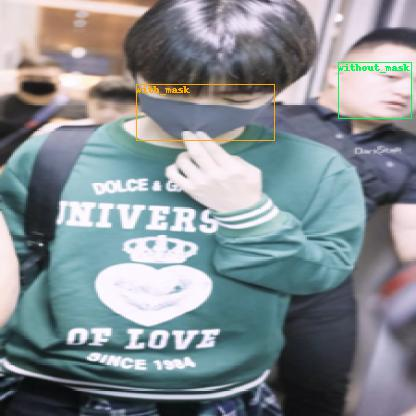

In [ ]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')


Input all the testing images to the trained model to run inference and save the output bounding boxes to the Yolov4_Deep_learncheckpointsYolov4_epoch50.txt text file.



In [ ]:
!mkdir tested_images

In [ ]:
import os
from PIL import Image  
import PIL  

#terminate = 3
for image in test_images:
  #terminate -= 1
  print(image)
  !python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch50.pth {"test/"+image} test/_classes.txt
  picture = Image.open(r'predictions.jpg')
  picture = picture.save(f'/content/tested_images/{image}.jpg', 'JPEG') 
  #if(terminate == 0):
    #break
  #print(class_names+"random_text")

maksssksksss586_png.rf.9d83e3705ed875b8758a4bf8b59bb727.jpg
/content/pytorch-YOLOv4/tool/utils.py:16: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(-x) + 1.)
['mask_weared_incorrect', 'with_mask', 'without_mask']
with_mask: 1.000000
with_mask: 1.000000
with_mask: 0.999885
save plot results to predictions.jpg
[[0.08486241847276688, 0.5084019107253928, 0.07623974429933648, 0.1306283287703991, 0.99954826, 1.0, 1], [0.3111012185874738, 0.49007100023721395, 0.12234742547336377, 0.24112770353492938, 0.99881953, 1.0, 1], [0.5171020156458804, 0.5105630324075097, 0.07553836781727641, 0.15286392973441826, 0.9852187, 0.9998852, 1]]
test/maksssksksss586_png.rf.9d83e3705ed875b8758a4bf8b59bb727.jpg
<class 'str'>
<class 'list'>
maksssksksss757_png.rf.be517906e023217c2404a0c3e072a8b9.jpg
['mask_weared_incorrect', 'with_mask', 'without_mask']
without_mask: 1.000000
save plot results to predictions.jpg
[[0.5397636012027138, 0.6038807175661388, 0.4277585054698743, 0.4096773986361529,

In [ ]:
import os
from PIL import Image

tested_images_list = [f for f in os.listdir('tested_images') if f.endswith('.jpg')]

for img in tested_images_list:
  pict = Image.open(f'/content/tested_images/{img}')
  pict.show()